In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.DataFrame(
    data={
        "x0":[7, 5, 7, 3, 4, 1, 0, 2, 8, 6, 5, 3], 
        'x1':[5, 7, 7, 3, 6, 4, 0, 2, 7, 8, 5, 7]})
df.head()

,x0,x1
0,7,5
1,5,7
2,7,7
3,3,3
4,4,6


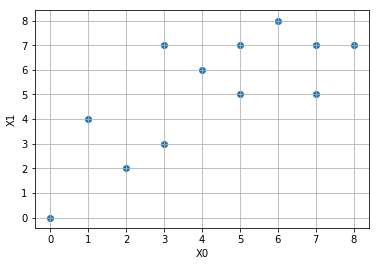

In [3]:
plt.scatter(df['x0'], df['x1'])
plt.xlabel("X0")
plt.ylabel("X1")
plt.grid()

## Making 2 clusters, Choosing our centroids

In [4]:
kmeans = KMeans(n_clusters=2, init='random')

In [5]:
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)
c = kmeans.cluster_centers_
c

[1 1 1 0 1 0 0 0 1 1 1 1]


array([[1.5  , 2.25 ],
       [5.625, 6.5  ]])

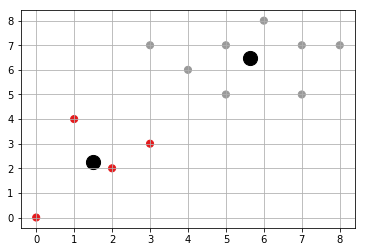

In [6]:
plt.scatter(df['x0'], df['x1'], c=y_kmeans, s=50, cmap='Set1')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            c='black', s=200)

In [7]:
print("Clusters found in {0} iterations".format(kmeans.n_iter_))

Clusters found in 2 iterations


## Distance between centroid and other cluster points

In [8]:
c1_centroid = c[0]
c2_centroid = c[1]

cluster1_points = df[y_kmeans==0]
cluster2_points = df[y_kmeans==1]


from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

c1_distances = cluster1_points.apply(lambda x: np.sqrt((x[0]-c1_centroid[0])**2 + (x[1]-c1_centroid[1])**2), axis=1)
c2_distances = cluster2_points.apply(lambda x: np.sqrt((x[0]-c2_centroid[0])**2 + (x[1]-c2_centroid[1])**2), axis=1)
print(c1_distances.sum())
print(c2_distances.sum())

6.760258906417911
14.26893478690252


In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score

silhouette_avg = silhouette_score(df, y_kmeans)
print(silhouette_avg)

0.5438942330933946


In [10]:
 # Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(df, y_kmeans)
print(sample_silhouette_values)

[0.54581521 0.64964649 0.68044859 0.42845148 0.45744591 0.46874175
 0.57130301 0.63680388 0.62677133 0.66271936 0.44190963 0.35667415]


Text(0.5,1,'Clustering Output, Silhoutte score=0.5439')

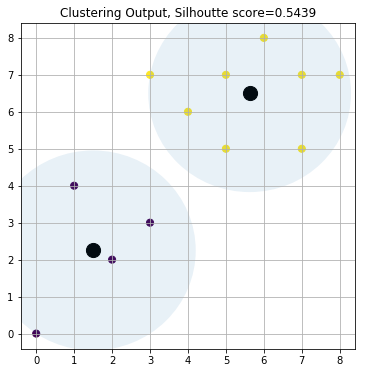

In [11]:
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection

fig, ax = plt.subplots(figsize=(6, 6), )

plt.scatter(df['x0'], df['x1'], c=y_kmeans, s=50)
plt.grid()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200)
circle1 = plt.Circle(c1_centroid, c1_distances.max(), alpha=0.1)
circle2 = plt.Circle(c2_centroid, c2_distances.max(), alpha=0.1)

ax.add_artist(circle1)
ax.add_artist(circle2)

plt.title("Clustering Output, Silhoutte score={0:.4f}".format(silhouette_avg))

## Some observations!

In [12]:
df_new = pd.DataFrame(data={"x0":[1, 2, 3, 1.5, 2.5], 'x1':[2, 2, 2, 0, 0]})
df_new

,x0,x1
0,1.0,2
1,2.0,2
2,3.0,2
3,1.5,0
4,2.5,0


In [13]:
# c = np.array([[1.5, 3], [1.5, 3], []])
kmeans = KMeans(n_clusters=3, init='random')
y_kmeans = kmeans.fit_predict(df_new)
print("Clusters found in {0} iterations".format(kmeans.n_iter_))
kmeans.cluster_centers_

Clusters found in 2 iterations


array([[2. , 0. ],
       [2.5, 2. ],
       [1. , 2. ]])

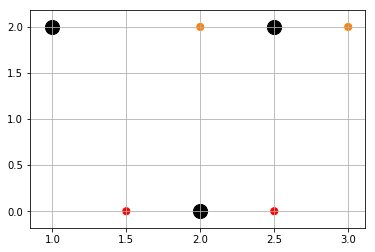

In [14]:
plt.scatter(df_new['x0'], df_new['x1'], c=y_kmeans, s=50, cmap='autumn')
plt.grid()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200);
# plt.title("Clustering with {0}".format(c1))